## RQ4
As part of RQ4, we analyze the correlation of user's attributes with the change in their behavior after facing harassment.

In [97]:
import pandas as pd
full_data = pd.read_csv("./full_data.csv", header = None)
full_data.head()

0                    1  \
0  2020-10-30T23:49:17.000Z  1322324726904180736   
1  2020-10-30T23:47:37.000Z  1322324307947696128   
2  2020-10-30T23:47:21.000Z  1322324242722115589   
3  2020-10-30T23:42:11.000Z  1322322943012200450   
4  2020-10-30T23:41:48.000Z  1322322845473607680   

                                                   2                    3  4  
0  @CharlieBewick5 Are you calling me bland and f...  1018986319786184704  0  
1                            @CharlieBewick5 Awww🥰🥰🥰  1018986319786184704  0  
2                               @CharlieBewick5 😽😽😽😽  1018986319786184704  0  
3                                 @CharlieBewick5 🤏🍆  1018986319786184704  0  
4                                 @CharlieBewick5 Oh  1018986319786184704  0

In [2]:
print(full_data[3].nunique())

293


In [3]:
tweet_type = []
for index, row in full_data.iterrows():
    if row[2][0] == '@':
        tweet_type.append('Reply')
        continue
    if row[2][0] == 'R' and row[2][1] == 'T':
        tweet_type.append('Retweet')
    else:
        tweet_type.append("Post")
        
full_data['Tweet Type'] = tweet_type

In [4]:
full_data = full_data.rename(columns={3: 'User ID', 4: 'is_after_harassment'})
full_data.head()

0                    1  \
0  2020-10-30T23:49:17.000Z  1322324726904180736   
1  2020-10-30T23:47:37.000Z  1322324307947696128   
2  2020-10-30T23:47:21.000Z  1322324242722115589   
3  2020-10-30T23:42:11.000Z  1322322943012200450   
4  2020-10-30T23:41:48.000Z  1322322845473607680   

                                                   2              User ID  \
0  @CharlieBewick5 Are you calling me bland and f...  1018986319786184704   
1                            @CharlieBewick5 Awww🥰🥰🥰  1018986319786184704   
2                               @CharlieBewick5 😽😽😽😽  1018986319786184704   
3                                 @CharlieBewick5 🤏🍆  1018986319786184704   
4                                 @CharlieBewick5 Oh  1018986319786184704   

   is_after_harassment Tweet Type  
0                    0      Reply  
1                    0      Reply  
2                    0      Reply  
3                    0      Reply  
4                    0      Reply

In [5]:
counts = full_data.groupby(['User ID', 'is_after_harassment']).size().reset_index(name="Total Count")
counts.head()

User ID  is_after_harassment  Total Count
0  15239674                    0          100
1  15239674                    1           99
2  15634495                    0          100
3  15634495                    1          100
4  17521339                    0           42

In [6]:
counts.shape[0]

560

In [101]:
import math
before = counts[counts['is_after_harassment'] == 0]
after = counts[counts['is_after_harassment'] == 1]
result = pd.merge(before, after, how="left", on=['User ID']) 
# Doing a left join so as to only include users who have before harassment activity
print(result.shape[0])
#result.head()

pd.set_option('display.max_rows', None)
#print(result)
values = {"is_after_harassment_x": 0.0, "Total Count_x": 1.0, "is_after_harassment_y": 1.0, "Total Count_y": 1.0}
result = result.fillna(value=values)
print(result)

#print(result.shape[0])
#print(before.shape[0])
#print(after.shape[0])
#print(result[math.isnan(result['is_after_harassment_y'])])
#print(result.columns.values.tolist())

272
                 User ID  is_after_harassment_x  Total Count_x  \
0               15239674                      0            100   
1               15634495                      0            100   
2               17521339                      0             42   
3               18361789                      0            100   
4               18836491                      0             79   
5               19062096                      0             99   
6               19877186                      0            100   
7               19902725                      0            100   
8               20139478                      0              8   
9               20328526                      0             33   
10              20944642                      0             98   
11              21949107                      0             24   
12              22157489                      0            100   
13              23818597                      0            100   
14    

Text(0, 0.5, 'After Harassment')

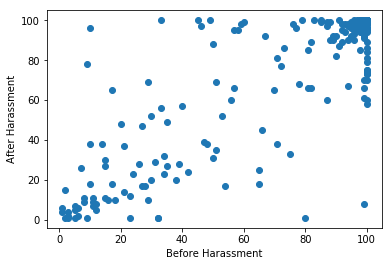

In [103]:
import matplotlib.pyplot as plt 

plt.scatter(x=result['Total Count_x'], y=result['Total Count_y'])
plt.xlabel("Before Harassment")
plt.ylabel("After Harassment")

In [104]:
# Get differences for the Tweet Posts 
result['Differences %'] = ((result['Total Count_y'] - result['Total Count_x'])/result['Total Count_x'])*100
#plt.hist(result['Differences %'], density=True, bins=30)
#print(result['Differences %'])
print(result)

                 User ID  is_after_harassment_x  Total Count_x  \
0               15239674                      0            100   
1               15634495                      0            100   
2               17521339                      0             42   
3               18361789                      0            100   
4               18836491                      0             79   
5               19062096                      0             99   
6               19877186                      0            100   
7               19902725                      0            100   
8               20139478                      0              8   
9               20328526                      0             33   
10              20944642                      0             98   
11              21949107                      0             24   
12              22157489                      0            100   
13              23818597                      0            100   
14        

In [105]:
import json

user_attributes = {}

def get_user_attributes():
    user_file = open('full_user_details.txt', 'r')
    user_lines = user_file .readlines()
 
    for line in user_lines:
        line_dict = dict(json.loads(line))
        #print(line_dict)
        if 'data' in line_dict:
            user_attributes[int(line_dict['data'][0]['id'])] = line_dict
        #print(user_attributes)
        #break
    
    user_file.close()

get_user_attributes()
print(len(user_attributes))

564


In [106]:
harassment_timestamps = {}

files = ['../data/user_timelines/2020_data_unverified_users.csv', '../data/user_timelines/2021_data_unverified_users.csv', '../data/user_timelines/2021_data_unverified_users_2.csv', '../data/user_timelines/2021_data_unverified_users_3.csv', '../data/user_timelines/datasets_2015-2017_ppdata.csv']


for file in files:
    user_file = open(file, 'r')
    user_lines = user_file.readlines()

    for line in user_lines:
        line_comps = line[:-1].split(',')
        harassment_timestamps[line_comps[0].lower()] = line_comps[1]

print(len(harassment_timestamps))

572


In [107]:
for key, value in user_attributes.items():
    user_name = value['data'][0]['username'].lower()
    harassment_timestamp = harassment_timestamps[user_name]
    value['harassment_timestamp'] = harassment_timestamp

In [108]:
print(user_attributes[15239674]['data'][0]['public_metrics']['followers_count'])

2071


In [110]:
def get_harassment_timestamp(key):
    if key in user_attributes :
        return user_attributes[key]['harassment_timestamp']
    else:
        return None

def get_created_at(key):
    if key in user_attributes :
        return user_attributes[key]['data'][0]['created_at']
    else:
        return None

def get_location(key):
    if key in user_attributes and 'location' in user_attributes[key]['data'][0]:
        return user_attributes[key]['data'][0]['location']
    else:
        return None

def get_followers_count(key):
    if key in user_attributes :
        return user_attributes[key]['data'][0]['public_metrics']['followers_count']
    else:
        return None

def get_following_count(key):
    if key in user_attributes :
        return user_attributes[key]['data'][0]['public_metrics']['following_count']
    else:
        return None

def get_tweet_count(key):
    if key in user_attributes :
        return user_attributes[key]['data'][0]['public_metrics']['tweet_count']
    else:
        return None

result['harassment_timestamp'] = result.apply (lambda row: get_harassment_timestamp(int(row['User ID'])), axis=1)
result['created_at'] = result.apply (lambda row: get_created_at(int(row['User ID'])), axis=1)
result['location'] = result.apply (lambda row: get_location(int(row['User ID'])), axis=1)
result['followers_count'] = result.apply (lambda row: get_followers_count(int(row['User ID'])), axis=1)
result['following_count'] = result.apply (lambda row: get_following_count(int(row['User ID'])), axis=1)
result['tweet_count'] = result.apply (lambda row: get_tweet_count(int(row['User ID'])), axis=1)
print(result)

                 User ID  is_after_harassment_x  Total Count_x  \
0               15239674                      0            100   
1               15634495                      0            100   
2               17521339                      0             42   
3               18361789                      0            100   
4               18836491                      0             79   
5               19062096                      0             99   
6               19877186                      0            100   
7               19902725                      0            100   
8               20139478                      0              8   
9               20328526                      0             33   
10              20944642                      0             98   
11              21949107                      0             24   
12              22157489                      0            100   
13              23818597                      0            100   
14        

In [111]:
missing_data = result.loc[result['harassment_timestamp'] == None]
print(missing_data)

Empty DataFrame
Columns: [User ID, is_after_harassment_x, Total Count_x, is_after_harassment_y, Total Count_y, Differences %, harassment_timestamp, created_at, location, followers_count, following_count, tweet_count]
Index: []


In [113]:
result.head()

User ID  is_after_harassment_x  Total Count_x  is_after_harassment_y  \
0  15239674                      0            100                    1.0   
1  15634495                      0            100                    1.0   
2  17521339                      0             42                    1.0   
3  18361789                      0            100                    1.0   
4  18836491                      0             79                    1.0   

   Total Count_y  Differences %      harassment_timestamp  \
0           99.0      -1.000000  2020-07-29T06:25:44.000Z   
1          100.0       0.000000  2021-06-27T14:10:50.000Z   
2           24.0     -42.857143  2020-07-29T17:52:41.000Z   
3          100.0       0.000000  2021-06-28T14:06:04.000Z   
4          100.0      26.582278  2021-01-08T13:22:28.000Z   

                 created_at                  location  followers_count  \
0  2008-06-26T02:54:34.000Z         Metro Atlanta, GA           2071.0   
1  2008-07-28T17:06:08.000Z  Wine Country, California           1547.0   
2  2008-11-20T20:35:33.000Z                   Alabama            470.0   
3  2008-12-24T17:56:58.000Z       Canvey Island, East           7415.0   
4  2009-01-10T15:16:01.000Z                   Florduh             55.0   

   following_count  tweet_count  
0           2070.0      33980.0  
1            345.0     113494.0  
2           1488.0       2198.0  
3           3290.0      60716.0  
4            151.0       2877.0

In [114]:
print(result)

                 User ID  is_after_harassment_x  Total Count_x  \
0               15239674                      0            100   
1               15634495                      0            100   
2               17521339                      0             42   
3               18361789                      0            100   
4               18836491                      0             79   
5               19062096                      0             99   
6               19877186                      0            100   
7               19902725                      0            100   
8               20139478                      0              8   
9               20328526                      0             33   
10              20944642                      0             98   
11              21949107                      0             24   
12              22157489                      0            100   
13              23818597                      0            100   
14        

In [115]:
followers_differences_corr = result['followers_count'].corr(result['Differences %'])
print(followers_differences_corr)

-0.013565403141216301


No correlation between followers count and differences observed

In [116]:
import datetime
harassment_time = datetime.datetime.strptime('2020-07-29T06:25:44.000Z', "%Y-%m-%dT%H:%M:%S.%fZ") 
create_time = datetime.datetime.strptime('2008-06-26T02:54:34.000Z', "%Y-%m-%dT%H:%M:%S.%fZ") 

print((harassment_time-create_time).days)

4416


In [117]:
result.head()

User ID  is_after_harassment_x  Total Count_x  is_after_harassment_y  \
0  15239674                      0            100                    1.0   
1  15634495                      0            100                    1.0   
2  17521339                      0             42                    1.0   
3  18361789                      0            100                    1.0   
4  18836491                      0             79                    1.0   

   Total Count_y  Differences %      harassment_timestamp  \
0           99.0      -1.000000  2020-07-29T06:25:44.000Z   
1          100.0       0.000000  2021-06-27T14:10:50.000Z   
2           24.0     -42.857143  2020-07-29T17:52:41.000Z   
3          100.0       0.000000  2021-06-28T14:06:04.000Z   
4          100.0      26.582278  2021-01-08T13:22:28.000Z   

                 created_at                  location  followers_count  \
0  2008-06-26T02:54:34.000Z         Metro Atlanta, GA           2071.0   
1  2008-07-28T17:06:08.000Z  Wine Country, California           1547.0   
2  2008-11-20T20:35:33.000Z                   Alabama            470.0   
3  2008-12-24T17:56:58.000Z       Canvey Island, East           7415.0   
4  2009-01-10T15:16:01.000Z                   Florduh             55.0   

   following_count  tweet_count  
0           2070.0      33980.0  
1            345.0     113494.0  
2           1488.0       2198.0  
3           3290.0      60716.0  
4            151.0       2877.0

In [118]:
missing_data = result.loc[result['created_at'] == None]
print(result.loc[68])

User ID                                 248234607
is_after_harassment_x                           0
Total Count_x                                 100
is_after_harassment_y                         1.0
Total Count_y                               100.0
Differences %                                 0.0
harassment_timestamp     2021-08-17T17:23:53.000Z
created_at               2011-02-06T15:15:24.000Z
location                           Leeds, England
followers_count                            1243.0
following_count                            1300.0
tweet_count                                1772.0
Name: 68, dtype: object


In [129]:
print(result.shape[0])

272


In [119]:

def get_date_diff(time1, time2):
    if time1 == None or time2 == None:
        return None
    else:
        return (datetime.datetime.strptime(time1, "%Y-%m-%dT%H:%M:%S.%fZ") - datetime.datetime.strptime(time2, "%Y-%m-%dT%H:%M:%S.%fZ")).days


import datetime
result['days_on_twitter'] = result.apply (lambda row: get_date_diff(row['harassment_timestamp'], row['created_at']), axis=1)
result.head()

User ID  is_after_harassment_x  Total Count_x  is_after_harassment_y  \
0  15239674                      0            100                    1.0   
1  15634495                      0            100                    1.0   
2  17521339                      0             42                    1.0   
3  18361789                      0            100                    1.0   
4  18836491                      0             79                    1.0   

   Total Count_y  Differences %      harassment_timestamp  \
0           99.0      -1.000000  2020-07-29T06:25:44.000Z   
1          100.0       0.000000  2021-06-27T14:10:50.000Z   
2           24.0     -42.857143  2020-07-29T17:52:41.000Z   
3          100.0       0.000000  2021-06-28T14:06:04.000Z   
4          100.0      26.582278  2021-01-08T13:22:28.000Z   

                 created_at                  location  followers_count  \
0  2008-06-26T02:54:34.000Z         Metro Atlanta, GA           2071.0   
1  2008-07-28T17:06:08.000Z  Wine Country, California           1547.0   
2  2008-11-20T20:35:33.000Z                   Alabama            470.0   
3  2008-12-24T17:56:58.000Z       Canvey Island, East           7415.0   
4  2009-01-10T15:16:01.000Z                   Florduh             55.0   

   following_count  tweet_count  days_on_twitter  
0           2070.0      33980.0           4416.0  
1            345.0     113494.0           4716.0  
2           1488.0       2198.0           4268.0  
3           3290.0      60716.0           4568.0  
4            151.0       2877.0           4380.0

In [120]:
days_on_twitter_corr = result['days_on_twitter'].corr(result['Differences %'])
print(days_on_twitter_corr)

-0.000901344972568938


In [121]:
tweet_count_corr = result['tweet_count'].corr(result['Differences %'])
print(tweet_count_corr)

-0.08028737950887306


In [127]:
followers_count_corr = result['followers_count'].corr(result['Differences %'])
print(followers_count_corr)

-0.013565403141216301


In [128]:
following_count_corr = result['following_count'].corr(result['Differences %'])
print(following_count_corr)

-0.03459563128572293


Decrease categories:
0 -> no change
-1 -> slight decrease
-2 -> significant decrease
1 -> slight increase 
2 -> slight increase 


In [130]:
def get_decrease_category(perc):
    if perc <= 5 and perc >= -5:
        return 0
    elif perc > 5 and perc <= 25:
        return 1
    elif perc > 25:
        return 2
    elif perc < -5 and perc >= -25:
        return -1
    else:
        return -2


result['decrease_category'] = result.apply (lambda row: get_decrease_category(row['Differences %']), axis=1)
result.head()

User ID  is_after_harassment_x  Total Count_x  is_after_harassment_y  \
0  15239674                      0            100                    1.0   
1  15634495                      0            100                    1.0   
2  17521339                      0             42                    1.0   
3  18361789                      0            100                    1.0   
4  18836491                      0             79                    1.0   

   Total Count_y  Differences %      harassment_timestamp  \
0           99.0      -1.000000  2020-07-29T06:25:44.000Z   
1          100.0       0.000000  2021-06-27T14:10:50.000Z   
2           24.0     -42.857143  2020-07-29T17:52:41.000Z   
3          100.0       0.000000  2021-06-28T14:06:04.000Z   
4          100.0      26.582278  2021-01-08T13:22:28.000Z   

                 created_at                  location  followers_count  \
0  2008-06-26T02:54:34.000Z         Metro Atlanta, GA           2071.0   
1  2008-07-28T17:06:08.000Z  Wine Country, California           1547.0   
2  2008-11-20T20:35:33.000Z                   Alabama            470.0   
3  2008-12-24T17:56:58.000Z       Canvey Island, East           7415.0   
4  2009-01-10T15:16:01.000Z                   Florduh             55.0   

   following_count  tweet_count  days_on_twitter  decrease_category  
0           2070.0      33980.0           4416.0                  0  
1            345.0     113494.0           4716.0                  0  
2           1488.0       2198.0           4268.0                 -2  
3           3290.0      60716.0           4568.0                  0  
4            151.0       2877.0           4380.0                  2

In [131]:
followers_decrease_corr = result['followers_count'].corr(result['decrease_category'])
print(followers_decrease_corr)

0.009748678331012168


In [132]:
following_decrease_corr = result['following_count'].corr(result['decrease_category'])
print(following_decrease_corr)

0.025943941850426207


In [133]:
tweet_count_decrease_corr = result['tweet_count'].corr(result['decrease_category'])
print(tweet_count_decrease_corr)

0.006825733351135136


In [134]:
days_in_twitter_decrease_corr = result['days_on_twitter'].corr(result['decrease_category'])
print(days_in_twitter_decrease_corr)

0.07543368408589156
